In [1]:
import numpy as np
from matplotlib import pyplot as plt

data = np.load('../data.npz')
r2r_conn = data['r2r_conn']
r2r_weights = data['r2r_weights']
spike_counts = data['spike_counts']
model_predicts = data['model_predicts']
C = data['C']

In [3]:
import sys
sys.path.append('../')
from utils import calculate_pev

pev = calculate_pev(spike_counts, C)
pev[0].shape

(25, 100)

In [6]:
core = C == 1

# pev[0][:, core].shape
# core.shape

(400, 100)

100%|██████████| 25/25 [00:01<00:00, 20.36it/s]


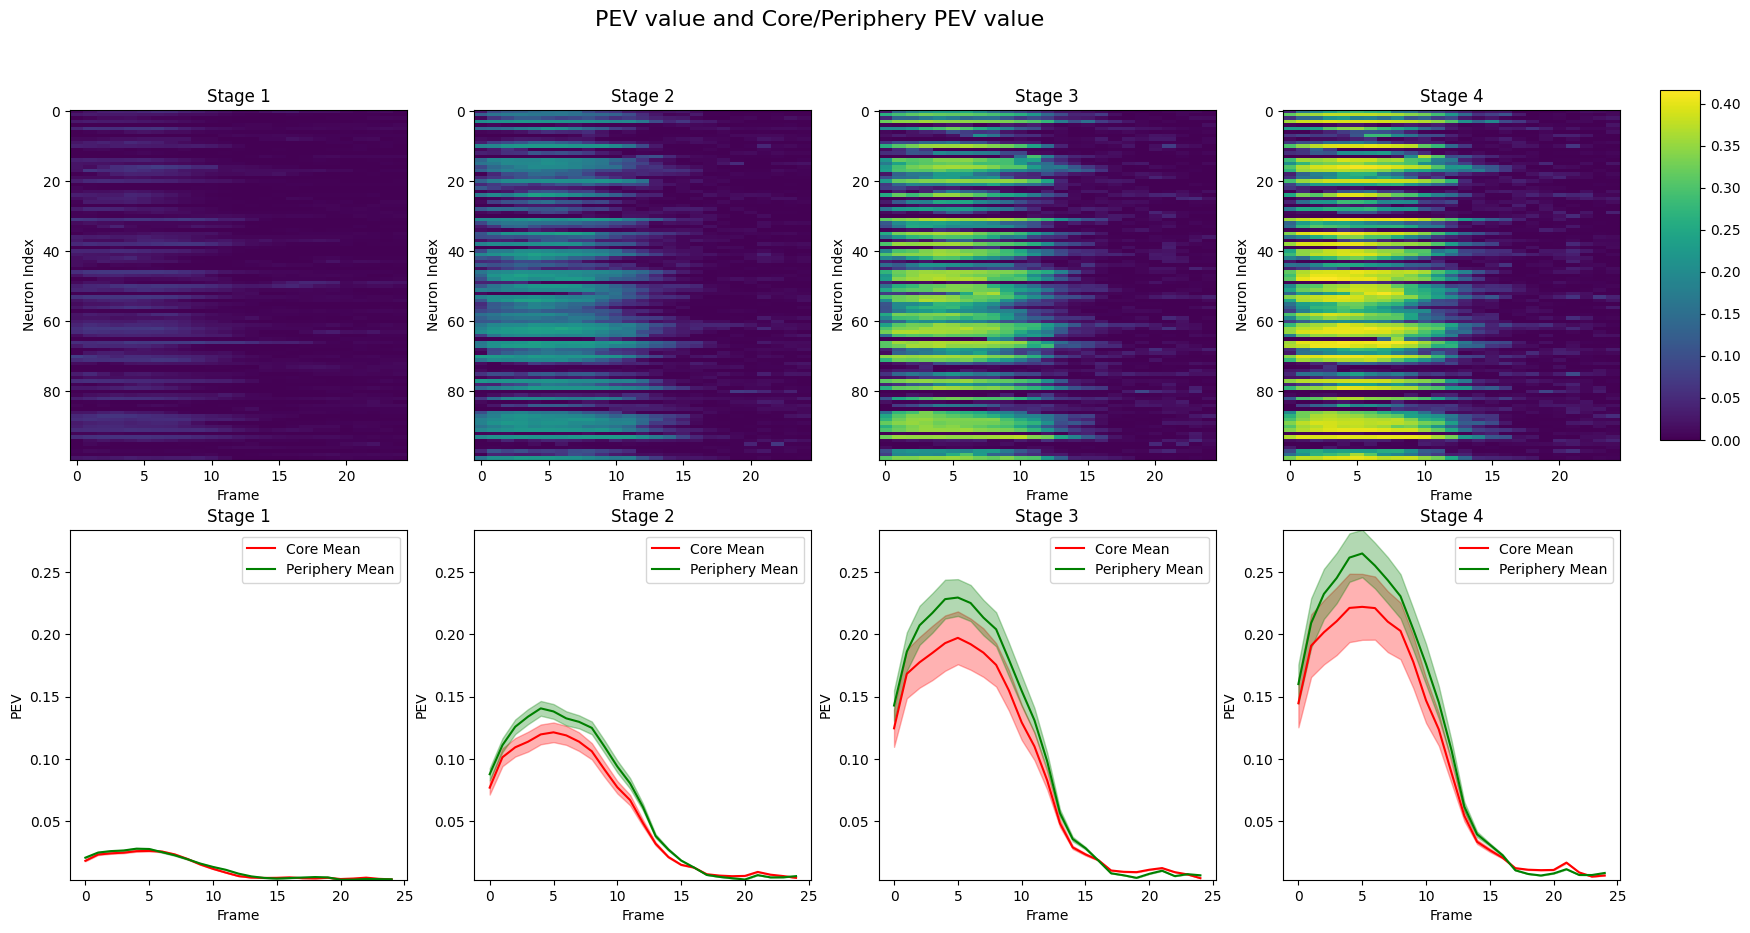

In [2]:
import sys
sys.path.append('../')
from utils import plot_spike_count

plot_spike_count(spike_counts, C, model_predicts)

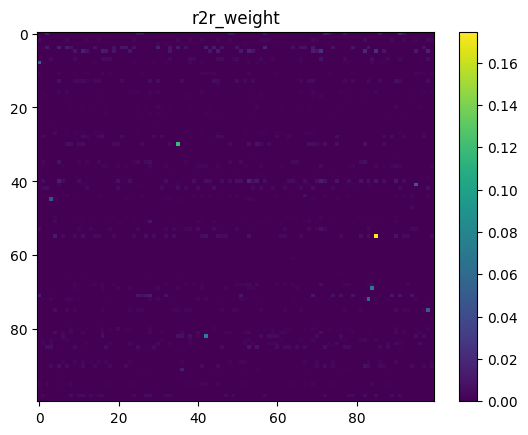

In [12]:
import networkx as nx

r2r_weights = r2r_weights * r2r_conn
plt.imshow(r2r_weights[-1], cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('r2r_weight')
plt.show()

In [13]:
G = nx.from_numpy_array(r2r_weights[-1])

# 计算平均路径长度
average_path_length = nx.average_shortest_path_length(G)
print(f"Average Path Length: {average_path_length}")

# 计算聚类系数
clustering_coefficient = nx.average_clustering(G)
print(f"Clustering Coefficient: {clustering_coefficient}")

# 生成一个随机网络进行比较
random_G = nx.erdos_renyi_graph(len(G), nx.density(G))

# 计算随机网络的平均路径长度
random_average_path_length = nx.average_shortest_path_length(random_G)
print(f"Random Network Average Path Length: {random_average_path_length}")

# 计算随机网络的聚类系数
random_clustering_coefficient = nx.average_clustering(random_G)
print(f"Random Network Clustering Coefficient: {random_clustering_coefficient}")

# 判断是否具有小世界特性
if (average_path_length <= random_average_path_length * 1.1 and
    clustering_coefficient >= random_clustering_coefficient * 1.5):
    print("The network exhibits small-world properties.")
else:
    print("The network does not exhibit small-world properties.")

Average Path Length: 1.648080808080808
Clustering Coefficient: 0.3556189787699704
Random Network Average Path Length: 1.6454545454545455
Random Network Clustering Coefficient: 0.3554990480228066
The network does not exhibit small-world properties.


In [21]:
import powerlaw
# 将 r2r_weight 竖着加起来
last_r2r_weight = r2r_weights[-10:]
r2r_weight_sum = np.nansum(last_r2r_weight, axis=2)

# print(np.any([np.isnan(r2r_weight) for r2r_weight in r2r_weight_sum.flatten()]))

flatten_r2r_weight_sum = r2r_weight_sum.flatten()
# 将所有的0值替换为1e-10，避免计算时出现无穷大
flatten_r2r_weight_sum[flatten_r2r_weight_sum == 0] = 1e-10
fit = powerlaw.Fit(r2r_weight_sum.flatten(), discrete=True)

# 输出幂律分布的参数
print(f"Alpha (幂律指数): {fit.power_law.alpha}")
print(f"Xmin (幂律分布的最小值): {fit.power_law.xmin}")

# 判断数据是否符合幂律分布
R, p = fit.distribution_compare('power_law', 'exponential')
print(f"幂律分布 vs 指数分布的似然比 (R): {R}")
print(f"p 值: {p}")

if p < 0.05:
    print("数据显著符合幂律分布。")
else:
    print("数据不符合幂律分布。")

# # 绘制竖着加起来后的柱状图，仅观察0到0.5的范围
# plt.figure(figsize=(12, 6))
# plt.hist(r2r_weight_sum.flatten(), bins=50)
# plt.title('Distribution of Summed r2r_weight')
# plt.xlabel('Weight')
# plt.ylabel('Frequency')
# plt.show()

Calculating best minimal value for power law fit
Alpha (幂律指数): 1.1847446066725897
Xmin (幂律分布的最小值): 0.03739524260163307
幂律分布 vs 指数分布的似然比 (R): -333.93773821978664
p 值: 1.3262430369866018e-269
数据显著符合幂律分布。


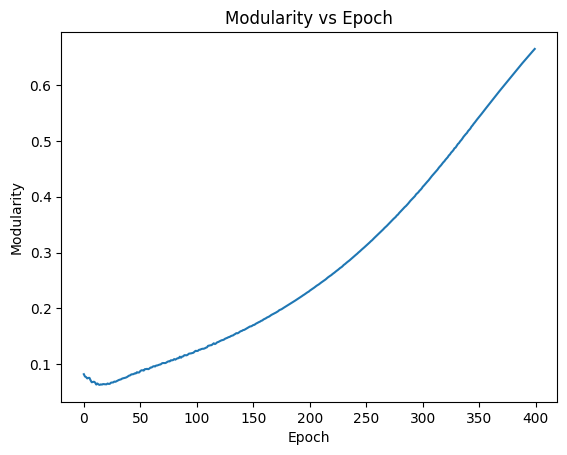

In [2]:
import sys
sys.path.append('../')
from utils import plot_modularity

plot_modularity(r2r_weights)